<a href="https://colab.research.google.com/github/Koushikgoud/document_clustering/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

In [3]:
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.0.0rc1
from stellargraph.datasets import Cora
import os

cora = Cora()
cora.download()

cora_cites_file = os.path.join(cora.base_directory, "cora.cites")
cora_content_file = os.path.join(cora.base_directory, "cora.content")

     |████████████████████████████████| 374 kB 8.6 MB/s 
     |████████████████████████████████| 500 kB 43.1 MB/s 
     |████████████████████████████████| 121 kB 70.2 MB/s 
     |████████████████████████████████| 1.6 MB 59.3 MB/s 
     |████████████████████████████████| 83 kB 2.5 MB/s 
     |████████████████████████████████| 41 kB 633 kB/s 


In [4]:
import pandas as pd
cora_cites = pd.read_csv(
    cora_cites_file,
    sep = "\t",
    header = None,
    names = ["target", "source"]
)
cora_cites

,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960
...,...,...
5424,853116,19621
5425,853116,853155
5426,853118,1140289
5427,853155,853118


In [5]:

cora_feature_names = [f"w{i}" for i in range(1433)]
cora_raw_content = pd.read_csv(
    cora_content_file,
    sep="\t",
    header = None,
    names = ["id", *cora_feature_names, "subject"]
)
cora_raw_content

,id,w0,w1,w2,w3,w4,w5,w6,w7,w8,...,w1424,w1425,w1426,w1427,w1428,w1429,w1430,w1431,w1432,subject
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,1128975,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2704,1128977,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2705,1128978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2706,117328,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Case_Based


In [6]:
cora_cites = pd.read_csv(
    cora_content_file,   
)

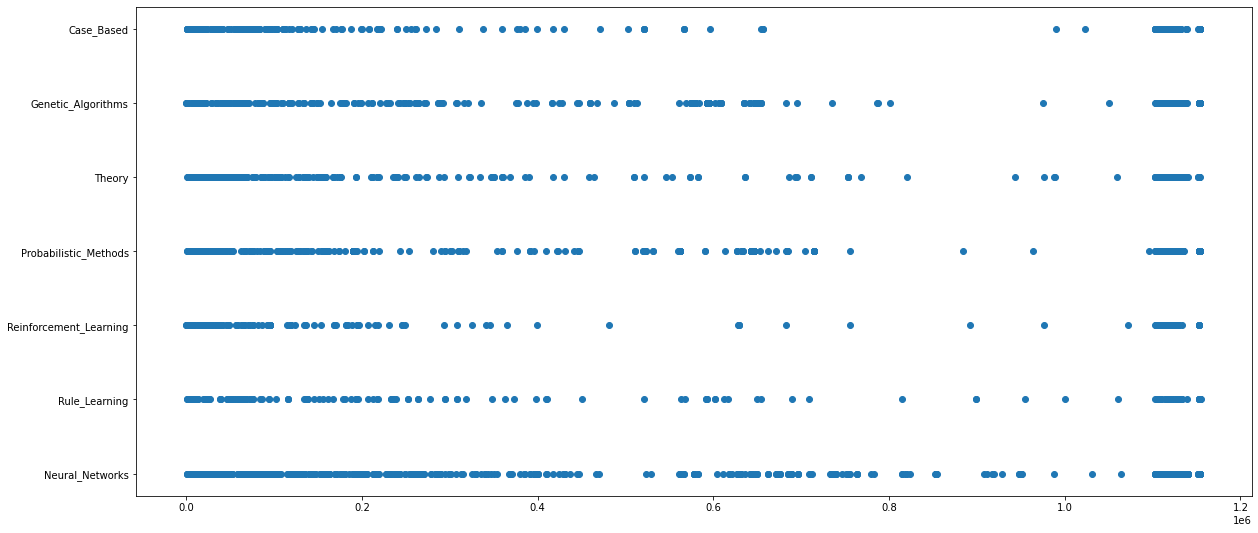

In [8]:
plt.figure(figsize=(20,9))
plt.scatter(cora_raw_content.id, cora_raw_content.subject)

In [155]:
cora_content_str_subject = cora_raw_content.set_index("id")

In [149]:
cora_content_no_subject = cora_content_str_subject.drop(columns="subject")
cora_content_no_subject

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w1423,w1424,w1425,w1426,w1427,w1428,w1429,w1430,w1431,w1432
id,,,,,,,,,,,,,,,,,,,,,
31336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1061127,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1106406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1128977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1128978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
pca = PCA()
# pca = PCA(n_components = 1433)

In [157]:
pca.fit(cora_content_no_subject)

PCA()

In [158]:
scores_pca = pca.transform(cora_content_no_subject)
scores_pca.size

3880564

In [159]:
kmeans_pca = KMeans(n_clusters = 7, init = "random", random_state = 42, verbose =0)
kmeans_pca.fit(scores_pca)

KMeans(init='random', n_clusters=7, random_state=42)

In [160]:
pd.DataFrame(scores_pca)

,0,1,2,3,4,5,6,7,8,9,...,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432
0,-0.309640,-0.582358,-0.104209,0.365658,1.090235,0.610694,0.414392,-0.099835,-0.141889,0.392378,...,-0.016504,-0.005303,-0.030468,0.021647,0.028925,0.004191,0.001455,0.003900,-1.743247e-16,-2.028477e-16
1,0.914533,0.304176,0.251011,-0.307102,-0.148311,-0.056488,-0.525818,-0.427518,-0.003499,-0.077078,...,0.008417,-0.002583,-0.003128,-0.007221,-0.002728,0.015387,-0.009663,0.001597,2.027917e-17,-1.763783e-16
2,0.702469,0.355973,0.212141,-0.607541,-0.612416,0.431762,0.129426,-0.084313,0.488957,0.211431,...,-0.011978,0.001166,0.002547,-0.004375,-0.009628,-0.000575,0.001072,-0.004331,2.883942e-16,-1.621299e-16
3,0.318051,-0.530007,0.532801,-0.141833,-0.174418,0.026296,-0.278267,-0.482922,0.365544,-0.039392,...,-0.008970,0.018393,-0.007757,-0.004980,0.012826,0.002769,0.004214,0.001098,1.409554e-16,-6.129324e-17
4,0.202732,-0.478307,0.835594,0.536438,1.185027,0.018348,0.633433,-0.244076,-0.439555,0.235195,...,0.021038,-0.001350,0.003040,-0.001546,-0.000319,0.004927,-0.006347,0.002953,-7.637757e-17,-1.041497e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,0.802053,0.133538,0.166652,-0.070150,-0.198695,0.014549,-0.454360,-0.183229,0.171767,-0.438784,...,-0.017648,0.013784,-0.015132,-0.010405,-0.012191,-0.011432,-0.004255,-0.005444,-1.966412e-18,-2.336617e-16
2704,-0.087018,-0.500128,-0.285870,0.302808,-0.573635,0.243740,0.175570,-0.322800,0.478809,-0.703078,...,0.023268,-0.002235,0.013737,0.002476,-0.032611,0.024409,-0.000183,0.000446,6.689409e-17,1.193912e-16
2705,0.199947,-0.618686,0.487566,0.438407,-0.670510,0.037486,-0.368906,-0.446180,0.664668,-0.394250,...,-0.001653,0.037106,0.005653,-0.002486,0.001201,-0.006079,0.003737,0.005791,-5.419415e-17,8.807824e-17
2706,-0.266535,-0.432540,-0.037158,-0.187786,-0.490428,-0.181808,-0.094217,0.205149,-0.201118,-0.318985,...,-0.002676,-0.005041,-0.006572,-0.000338,-0.008338,-0.005069,-0.000381,0.003232,1.842787e-16,-7.440039e-17


In [161]:
# df_segm_pca_kmeans = pd.concat([cora_content_no_subject.reset_index(drop = True), pd.DataFrame(scores_pca)], axis =1)
# scores_pca = pd.concat([kmeans_pca.labels_, pd.DataFrame(scores_pca)], axis = 1)
kmeans_labels = kmeans_pca.labels_

In [162]:
import numpy as np
np.unique(kmeans_labels)

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [163]:
kmeans_result = pd.DataFrame({"Predictions":kmeans_pca.labels_})

In [164]:
y, y_idx = pd.factorize(cora_content_str_subject["subject"])
y_idx

Index(['Neural_Networks', 'Rule_Learning', 'Reinforcement_Learning',
       'Probabilistic_Methods', 'Theory', 'Genetic_Algorithms', 'Case_Based'],
      dtype='object')

In [165]:
y_mapping = {y_idx[k]: k for k in range(7) }
y_mapping

{'Neural_Networks': 0,
 'Rule_Learning': 1,
 'Reinforcement_Learning': 2,
 'Probabilistic_Methods': 3,
 'Theory': 4,
 'Genetic_Algorithms': 5,
 'Case_Based': 6}

In [166]:
kmeans_labels[y==0]

array([0, 0, 3, 3, 3, 4, 4, 3, 3, 4, 4, 0, 4, 4, 6, 4, 4, 4, 4, 3, 3, 4,
       4, 4, 6, 3, 0, 0, 4, 3, 4, 4, 4, 4, 4, 5, 3, 4, 5, 6, 6, 3, 3, 3,
       3, 3, 4, 3, 3, 6, 6, 4, 4, 3, 4, 3, 3, 6, 3, 5, 6, 5, 4, 3, 4, 3,
       5, 6, 3, 3, 4, 0, 3, 4, 6, 0, 5, 3, 6, 4, 3, 4, 4, 4, 5, 0, 5, 5,
       6, 6, 4, 3, 4, 4, 5, 6, 3, 6, 5, 3, 3, 4, 4, 3, 6, 4, 4, 4, 3, 3,
       3, 0, 6, 4, 4, 4, 6, 5, 4, 6, 4, 5, 5, 3, 3, 0, 3, 0, 0, 3, 3, 5,
       3, 6, 4, 6, 6, 4, 4, 4, 4, 4, 5, 4, 4, 5, 3, 3, 3, 3, 3, 3, 4, 5,
       5, 4, 4, 3, 6, 4, 3, 3, 4, 3, 4, 4, 4, 4, 6, 4, 4, 3, 6, 1, 3, 3,
       4, 5, 5, 4, 3, 3, 6, 3, 4, 4, 6, 4, 6, 3, 4, 6, 3, 5, 3, 4, 5, 3,
       5, 4, 6, 4, 3, 4, 6, 3, 5, 4, 4, 4, 6, 4, 4, 4, 3, 4, 3, 3, 4, 6,
       0, 6, 6, 4, 4, 3, 5, 3, 6, 5, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 6,
       3, 0, 3, 4, 3, 0, 5, 4, 5, 4, 4, 0, 6, 3, 4, 0, 6, 5, 4, 0, 4, 4,
       3, 4, 4, 3, 3, 3, 3, 5, 5, 6, 5, 5, 4, 4, 4, 3, 0, 5, 4, 4, 4, 4,
       4, 6, 6, 4, 3, 3, 3, 3, 3, 4, 0, 4, 5, 4, 4,

In [167]:
np.bincount(kmeans_labels[y==0])

array([ 50,   1,   0, 219, 340,  94, 114])

In [168]:
from sklearn.metrics import normalized_mutual_info_score as nmi
from sklearn.metrics import adjusted_rand_score as ari
from sklearn.metrics import accuracy_score as acc

In [169]:
hungarian = []
for k in range(7):
    hungarian.append(np.bincount(kmeans_labels[y==k]))
from scipy.optimize import linear_sum_assignment
_, hg_mapping = linear_sum_assignment(hungarian, maximize=True)

In [170]:
acc = acc([hg_mapping[i] for i in y], kmeans_pca.labels_)

In [171]:
print(f'ACC: {(acc):.3f}')
for m, m_name in [(nmi, 'NMI'), (ari, 'ARI')]:
    print(f'{m_name}: {m(y, kmeans_labels):.3f}')

ACC: 0.387
NMI: 0.199
ARI: 0.119
